In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Fisheries Model - Exploratory Data Analysis

In [2]:
# Import Cleaned data
df = pd.read_csv('Aggregated_Data.csv')
# Describe Data
df.describe

<bound method NDFrame.describe of               DATE   QDSQ    LAT    LON                   COMNAME  KEPT  ASM  \
0       1999-01-01  35753  35.75 -75.25                  BLUEFISH     0    0   
1       1999-01-01  35753  35.75 -75.25                  BLUEFISH     1    0   
2       1999-01-01  35753  35.75 -75.25            DOGFISH, SPINY     0    0   
3       1999-01-01  35753  35.75 -75.25  FLOUNDER, SUMMER (FLUKE)     0    0   
4       1999-01-01  35753  35.75 -75.25  FLOUNDER, SUMMER (FLUKE)     1    0   
...            ...    ...    ...    ...                       ...   ...  ...   
159911  2025-01-01  43692  43.25 -69.75           SKATE, BARNDOOR     0    0   
159912  2025-01-01  43692  43.25 -69.75             SKATE, THORNY     0    0   
159913  2025-01-01  43692  43.25 -69.75       SKATE, WINTER (BIG)     0    0   
159914  2025-01-01  43692  43.25 -69.75  SQUID, LONGFIN, ATLANTIC     0    0   
159915  2025-01-01  43692  43.25 -69.75        WOLFFISH, ATLANTIC     0    1   

     

In [3]:
# Species count
species_counts = df['COMNAME'].value_counts()
print(species_counts.head(20))

COMNAME
MONKFISH (GOOSEFISH)            10775
LOBSTER, AMERICAN                9784
FLOUNDER, WITCH (GREY SOLE)      8728
COD, ATLANTIC                    8489
HADDOCK                          8482
FLOUNDER, PLAICE, AMERICAN       8394
SKATE, WINTER (BIG)              8095
HAKE, SILVER (WHITING)           7210
REDFISH, ACADIAN                 7100
POLLOCK                          6573
HAKE, WHITE                      6456
DOGFISH, SPINY                   6129
FLOUNDER, YELLOWTAIL             5183
FLOUNDER, WINTER (BLACKBACK)     5143
HAKE, RED (LING)                 4998
SKATE, BARNDOOR                  4947
SKATE, LITTLE                    4628
RAVEN, SEA                       4477
SKATE, THORNY                    4344
FLOUNDER, SUMMER (FLUKE)         3701
Name: count, dtype: int64


In [4]:
# Total biomass per species
biomass_by_species = df.groupby('COMNAME')['LIVEWT'].sum().sort_values(ascending=False)
print(biomass_by_species)

COMNAME
SKATE, WINTER (BIG)                52312596.7
HADDOCK                            45161621.8
MONKFISH (GOOSEFISH)               42373915.2
SKATE, LITTLE                      30390708.4
POLLOCK                            26149960.8
DOGFISH, SPINY                     25269944.2
COD, ATLANTIC                      22403580.3
REDFISH, ACADIAN                   21643380.3
FLOUNDER, WINTER (BLACKBACK)       11445200.5
HAKE, WHITE                        11273227.6
FLOUNDER, YELLOWTAIL               11100735.6
FLOUNDER, PLAICE, AMERICAN          9739484.5
FLOUNDER, WITCH (GREY SOLE)         7778673.6
SKATE, BARNDOOR                     7513780.2
LOBSTER, AMERICAN                   7501978.0
FLOUNDER, SUMMER (FLUKE)            5369968.1
HAKE, SILVER (WHITING)              2308170.9
SKATE, THORNY                       2255749.9
FLOUNDER, WINDOWPANE (SAND DAB)     1932443.8
RAVEN, SEA                          1788958.1
SCULPIN, LONGHORN                   1151237.8
HAKE, RED (LING)          

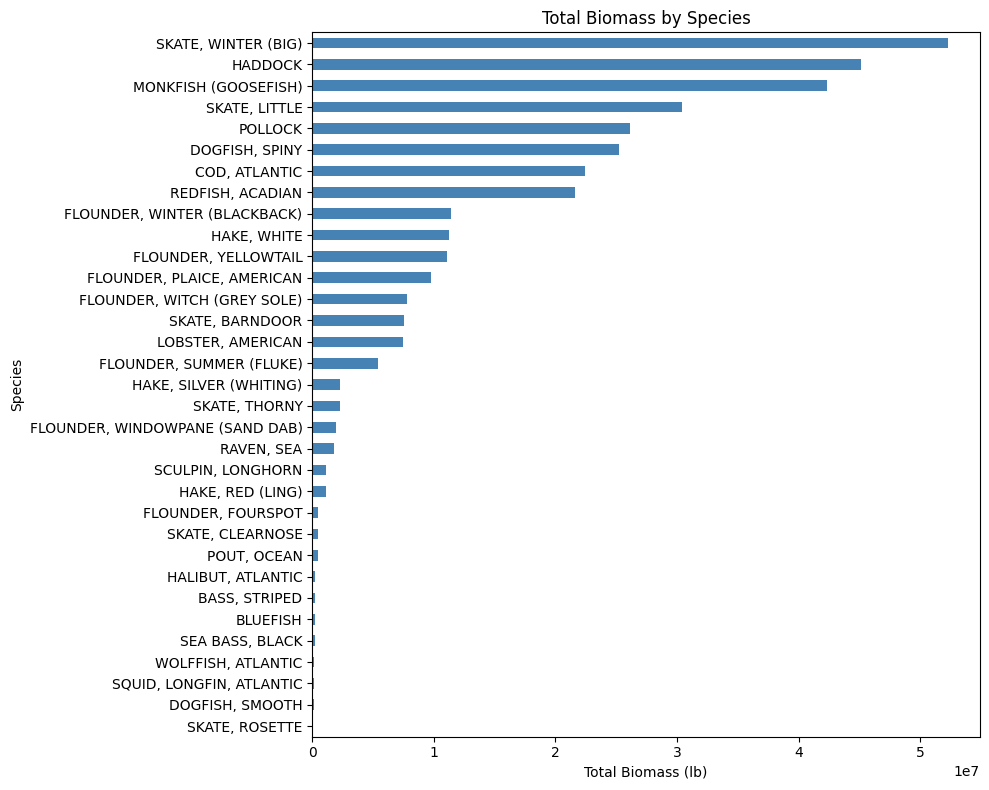

In [5]:
# Bar chart
biomass_by_species.sort_values(ascending=True).plot(
    kind="barh", figsize=(10, 8), legend=False, color='steelblue'
)
plt.xlabel("Total Biomass (lb)")
plt.ylabel("Species")
plt.title("Total Biomass by Species")
plt.tight_layout()
plt.show()

/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/2155565390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kept_vs_discard, x="Disposition", y="LIVEWT", palette="Set2")


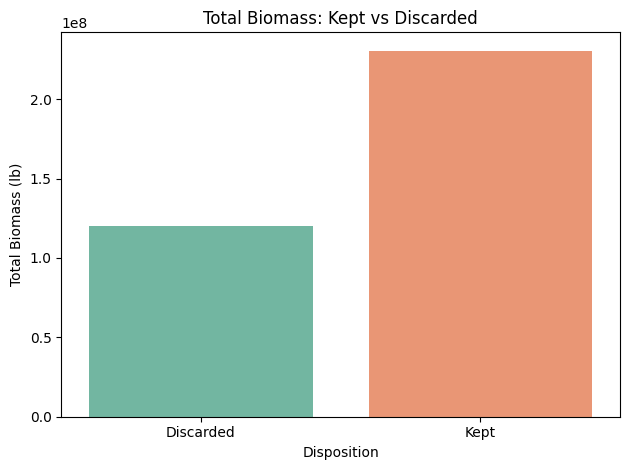

In [8]:
# Group by KEPT flag and sum biomass
kept_vs_discard = df.groupby("KEPT")["LIVEWT"].sum().reset_index()

# Label the KEPT flag
kept_vs_discard["Disposition"] = kept_vs_discard["KEPT"].map({0: "Discarded", 1: "Kept"})

# Plot
sns.barplot(data=kept_vs_discard, x="Disposition", y="LIVEWT", palette="Set2")
plt.ylabel("Total Biomass (lb)")
plt.title("Total Biomass: Kept vs Discarded")
plt.tight_layout()
plt.show()


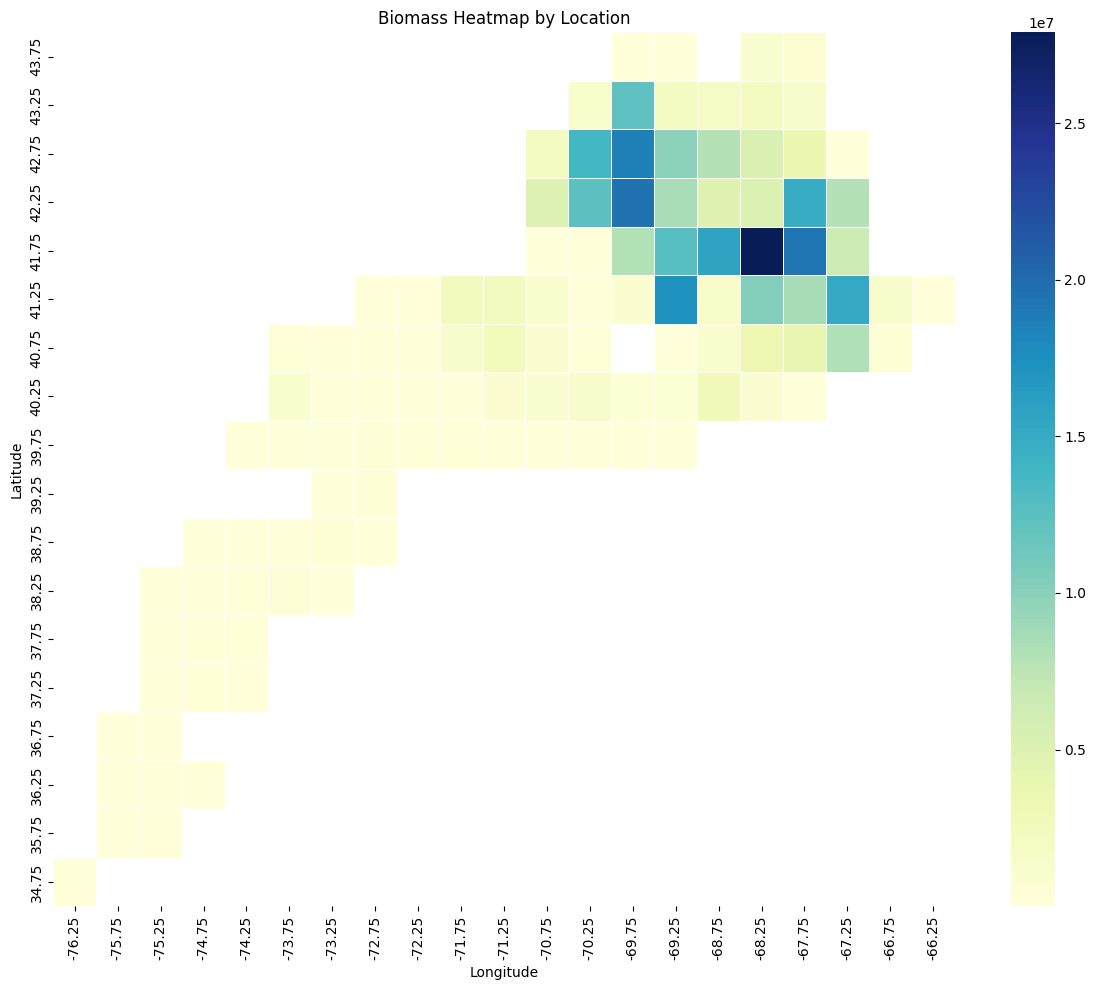

In [9]:
# df_plot = df[df['KEPT'] == 1]
df_plot = df.copy()  # or filter as needed

# Bin lat/lon for grouping (e.g., to nearest 0.25°)
df_plot["LAT_bin"] = df_plot["LAT"].round(2)
df_plot["LON_bin"] = df_plot["LON"].round(2)

# Aggregate total biomass by location bins
heatmap_data = df_plot.groupby(["LAT_bin", "LON_bin"])["LIVEWT"].sum().reset_index()

# Pivot to create grid
heatmap_grid = heatmap_data.pivot(index="LAT_bin", columns="LON_bin", values="LIVEWT")

# Sort axes (optional: reverse lat for map-style display)
heatmap_grid = heatmap_grid.sort_index(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_grid, cmap="YlGnBu", linewidths=0.5)
plt.title("Biomass Heatmap by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/3898227586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_df["LAT_bin"] = cod_df["LAT"].round(2)
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/3898227586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_df["LON_bin"] = cod_df["LON"].round(2)


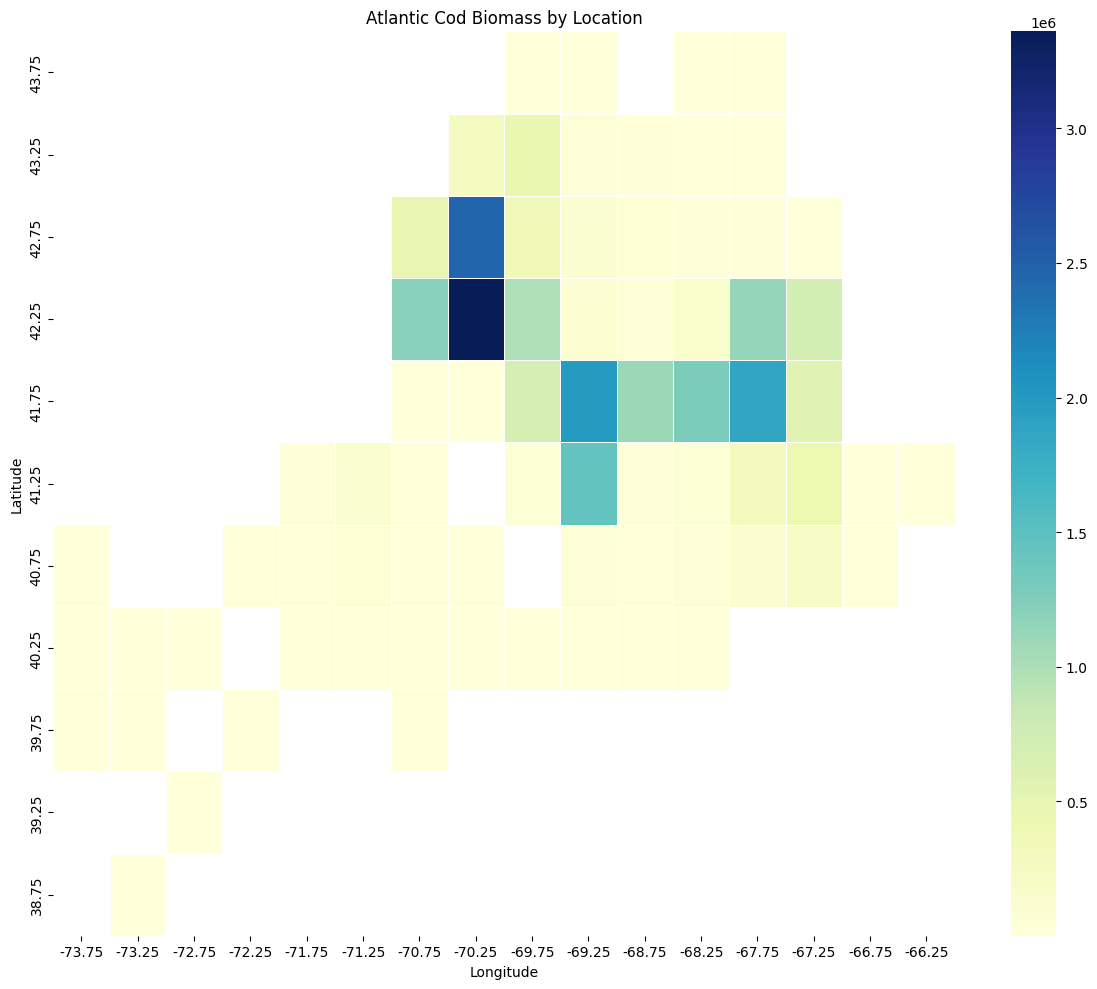

In [10]:
# Filter for COD
cod_df = df[df["COMNAME"] == "COD, ATLANTIC"]

# Bin lat/lon to control resolution (you can adjust rounding if needed)
cod_df["LAT_bin"] = cod_df["LAT"].round(2)
cod_df["LON_bin"] = cod_df["LON"].round(2)

# Aggregate biomass
cod_heatmap = cod_df.groupby(["LAT_bin", "LON_bin"])["LIVEWT"].sum().reset_index()

# Pivot to 2D grid
cod_pivot = cod_heatmap.pivot(index="LAT_bin", columns="LON_bin", values="LIVEWT").sort_index(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cod_pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Atlantic Cod Biomass by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [12]:
# COnvert Date to Date time
df["DATE"] = pd.to_datetime(df["DATE"])


/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/292340179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_2020["LAT_bin"] = cod_2020["LAT"].round(2)
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/292340179.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cod_2020["LON_bin"] = cod_2020["LON"].round(2)
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/292340179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

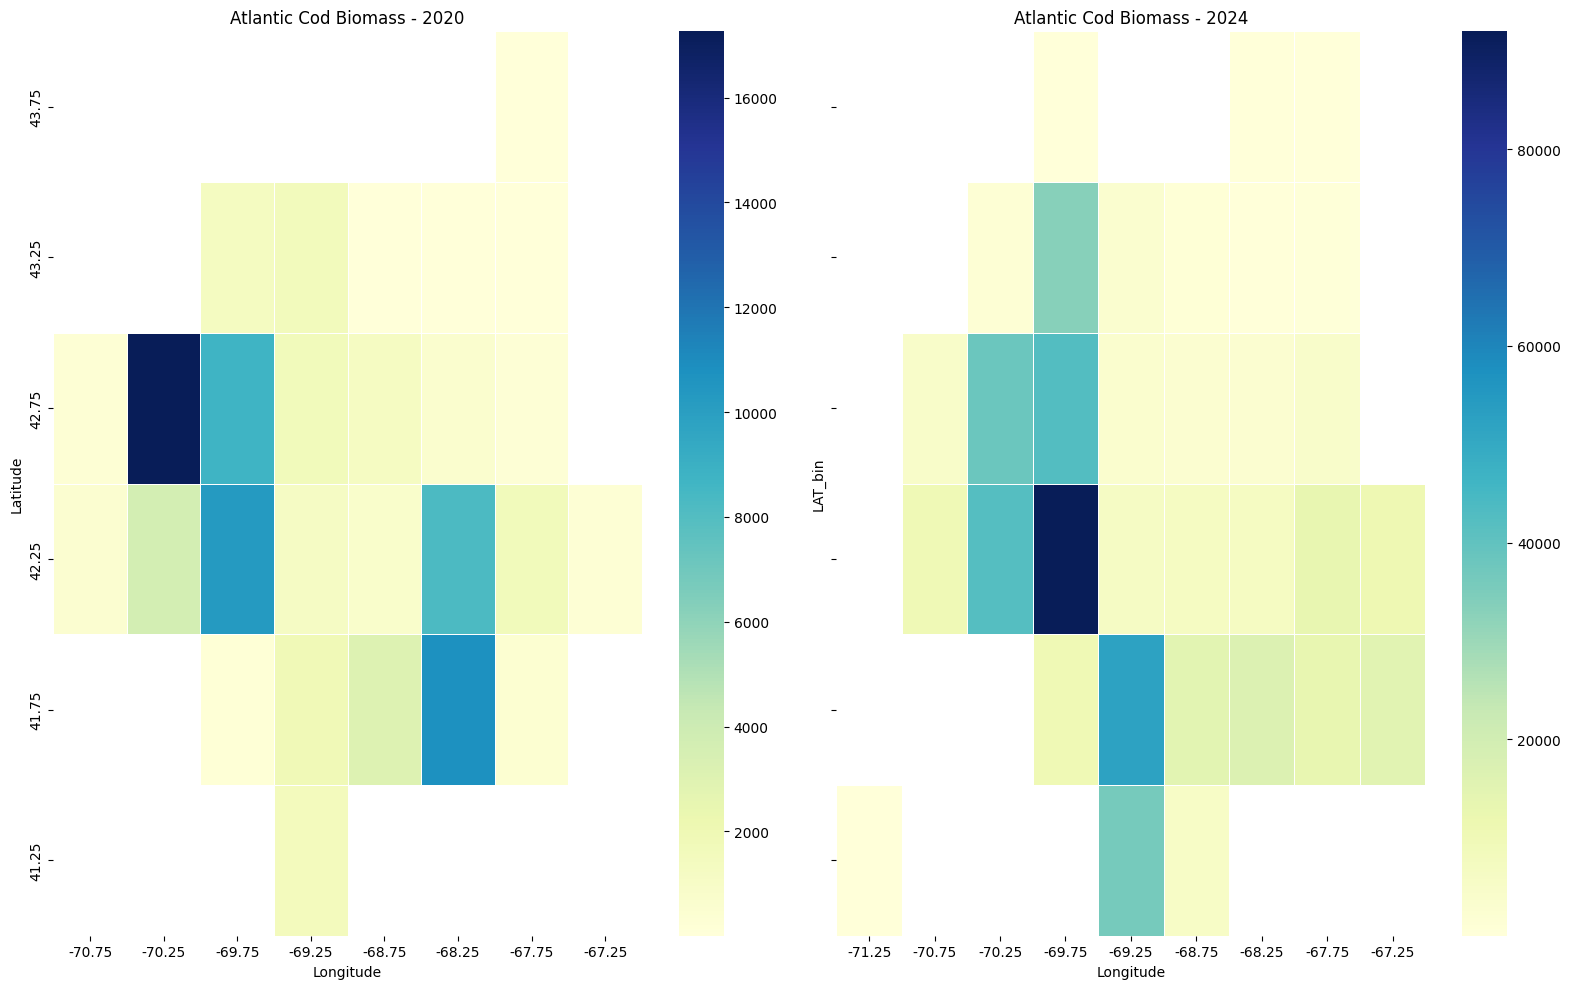

In [13]:
# Filter for Cod and the two years
cod_2020 = df[(df["COMNAME"] == "COD, ATLANTIC") & (df["DATE"].dt.year == 2020)]
cod_2024 = df[(df["COMNAME"] == "COD, ATLANTIC") & (df["DATE"].dt.year == 2024)]

# Bin lat/lon for mapping resolution
cod_2020["LAT_bin"] = cod_2020["LAT"].round(2)
cod_2020["LON_bin"] = cod_2020["LON"].round(2)
cod_2024["LAT_bin"] = cod_2024["LAT"].round(2)
cod_2024["LON_bin"] = cod_2024["LON"].round(2)

# Aggregate biomass
heatmap_2020 = cod_2020.groupby(["LAT_bin", "LON_bin"])["LIVEWT"].sum().reset_index()
heatmap_2024 = cod_2024.groupby(["LAT_bin", "LON_bin"])["LIVEWT"].sum().reset_index()

# Pivot for heatmap
pivot_2020 = heatmap_2020.pivot(index="LAT_bin", columns="LON_bin", values="LIVEWT").sort_index(ascending=False)
pivot_2024 = heatmap_2024.pivot(index="LAT_bin", columns="LON_bin", values="LIVEWT").sort_index(ascending=False)

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

sns.heatmap(pivot_2020, ax=axes[0], cmap="YlGnBu", linewidths=0.5)
axes[0].set_title("Atlantic Cod Biomass - 2020")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

sns.heatmap(pivot_2024, ax=axes[1], cmap="YlGnBu", linewidths=0.5)
axes[1].set_title("Atlantic Cod Biomass - 2024")
axes[1].set_xlabel("Longitude")

plt.tight_layout()
plt.show()


Important to note at this point that observer coverage changes from year to year, so there will be large jumps in biomass accounted for as a result as seen above. 

In [15]:
# Import Haul Level Dataset
df2 = pd.read_csv('Species_Record_Data.csv')

In [17]:
# Convert to datetime
df2['DATE'] = pd.to_datetime(df2['DATE'])

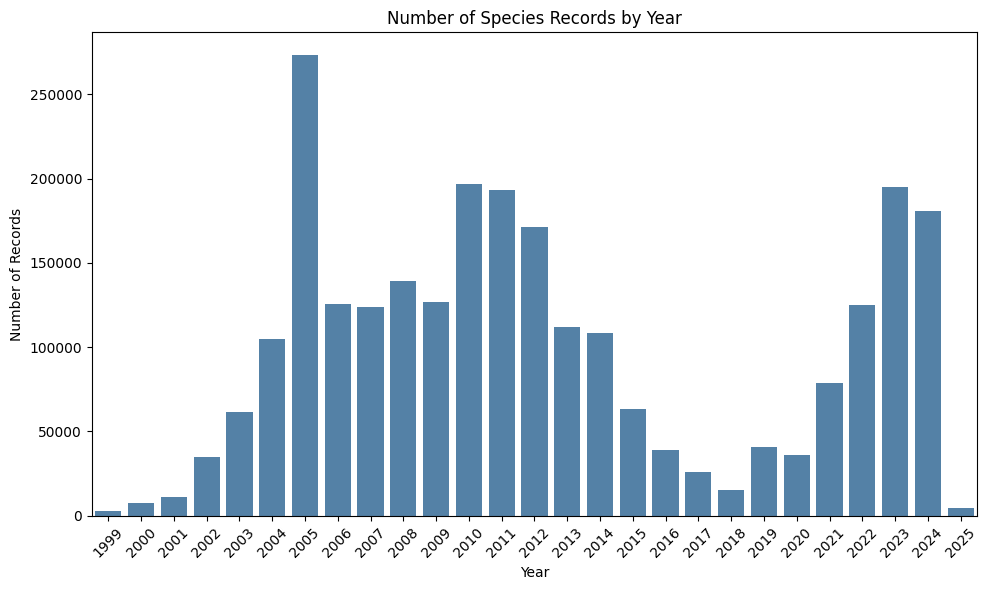

In [19]:
# Extract year
df2['YEAR'] = df2['DATE'].dt.year

# Count records per year
records_per_year = df2.groupby('YEAR').size().reset_index(name='RecordCount')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=records_per_year, x='YEAR', y='RecordCount', color='steelblue')
plt.title('Number of Species Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


While this is not an exact reflection of coverage or hauls, at this scale I feel it is reasonable to believe species records would be reflective of coverage efforts, and it is out closest proxy available given the data.

In [23]:
# Ensure DATE is datetime and extract YEAR and MONTH
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

# Filter to ASM species
df_asm = df[df['ASM'] == 1]

# Group by species, year, and month
biomass_by_month = df_asm.groupby(['COMNAME', 'YEAR', 'MONTH'])['LIVEWT'].sum().reset_index()

# OPTIONAL: restrict to years 1999–2024 (if needed)
biomass_by_month = biomass_by_month[(biomass_by_month['YEAR'] >= 1999) & (biomass_by_month['YEAR'] <= 2024)]


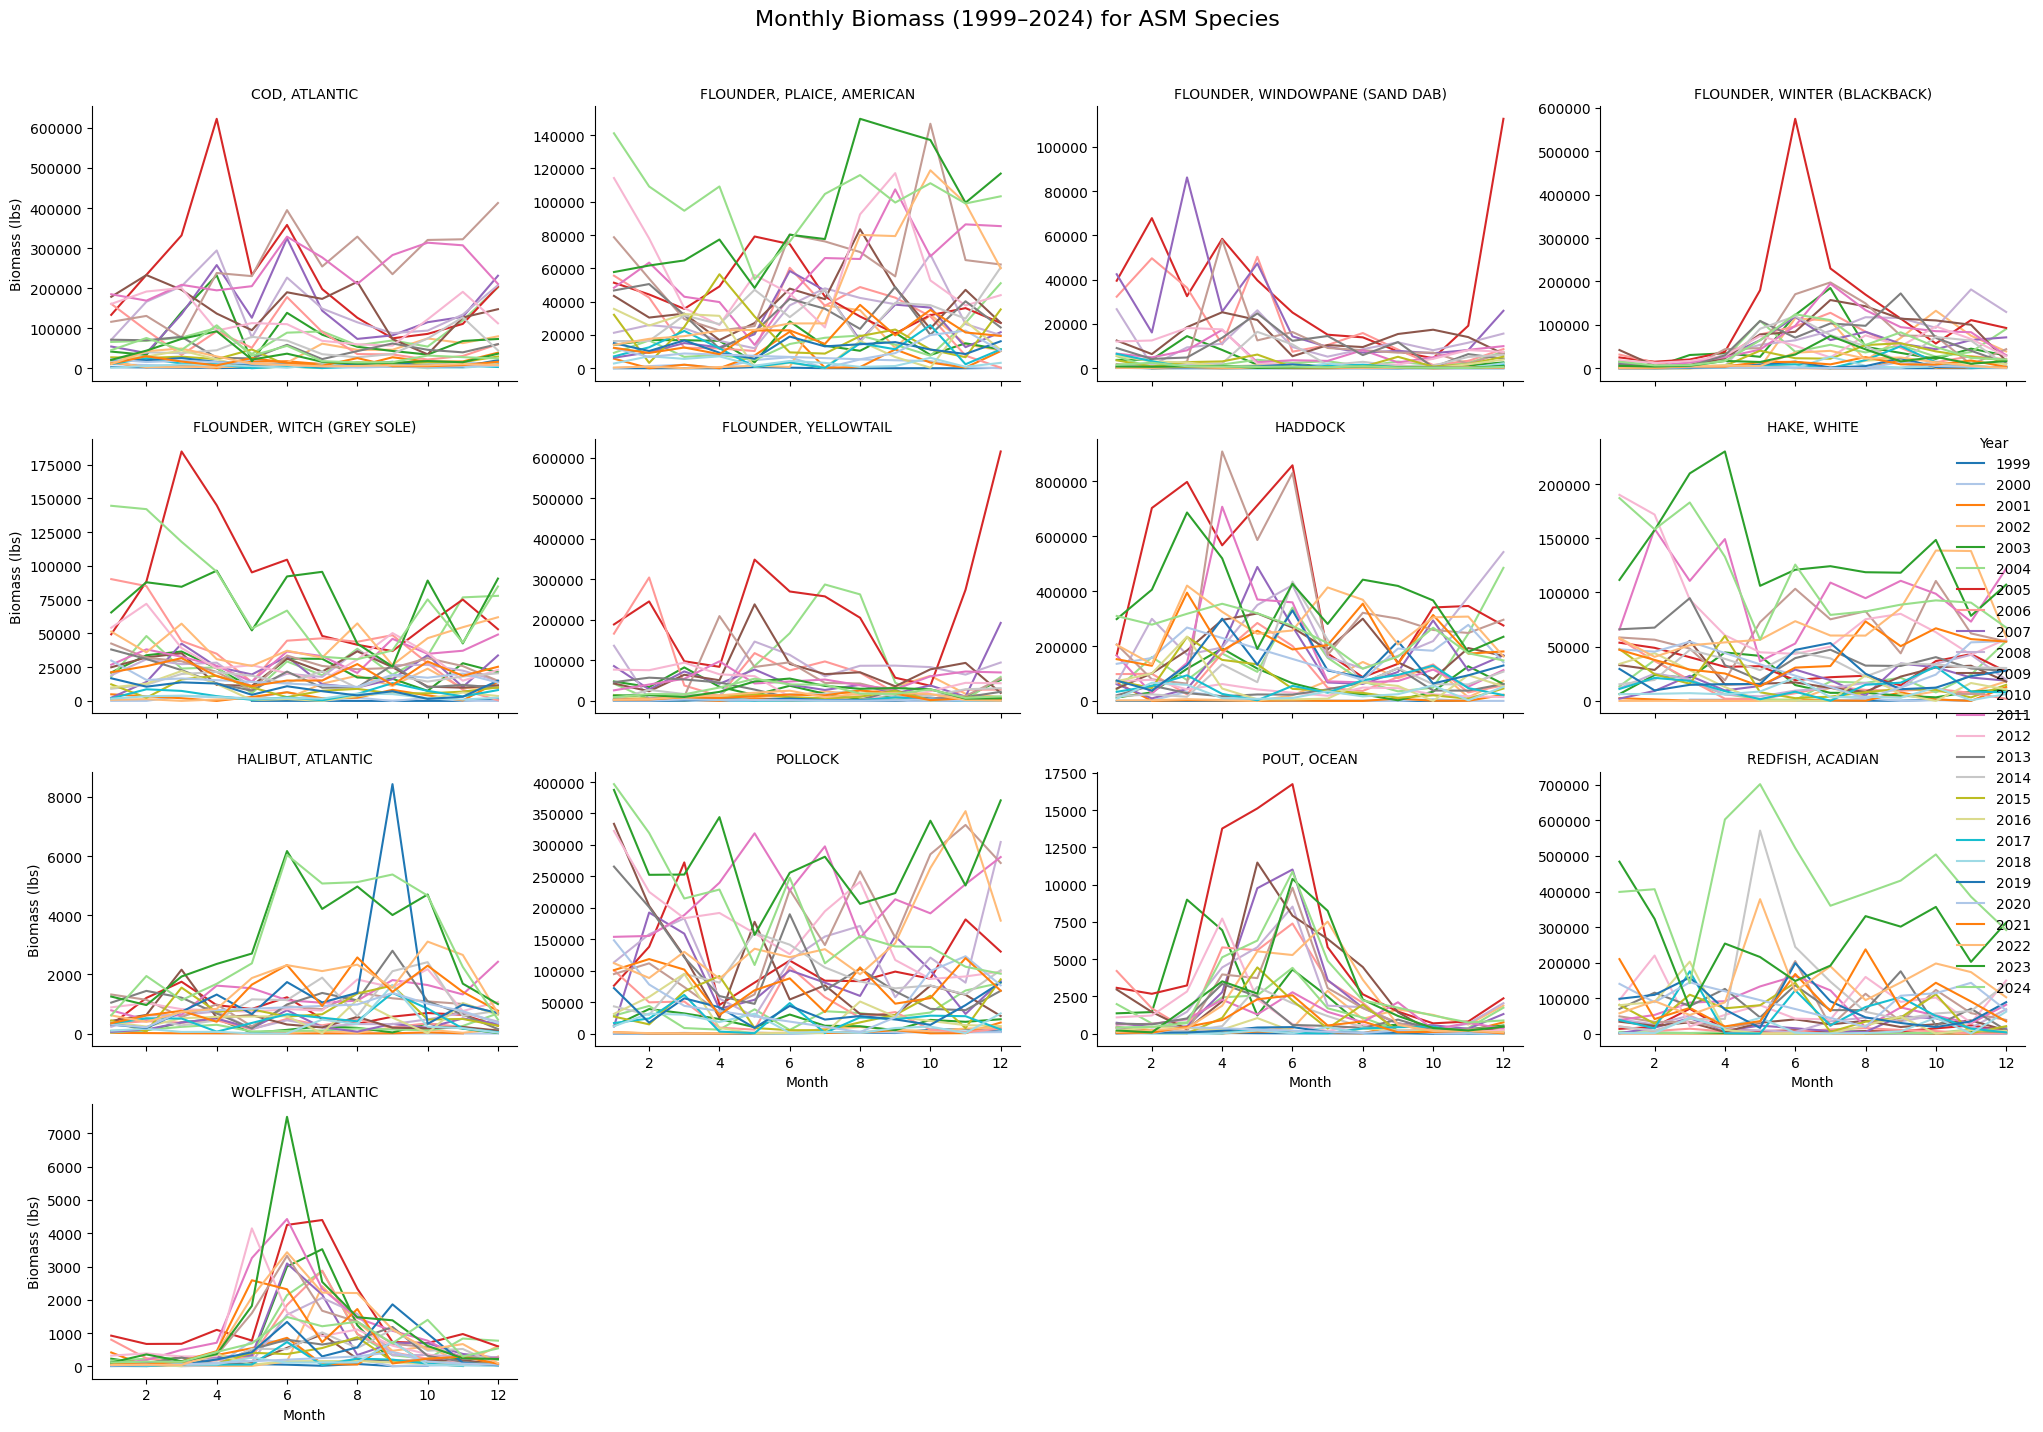

In [25]:
# Color palette with enough separation
unique_years = sorted(biomass_by_month["YEAR"].unique())
num_years = len(unique_years)
palette = sns.color_palette("tab20", n_colors=num_years)

# Map each year to a color
year_palette = dict(zip(unique_years, palette))

# Facet grid with custom palette
g = sns.FacetGrid(
    biomass_by_month,
    col="COMNAME",
    col_wrap=4,
    sharey=False,
    height=3.5,
    aspect=1.4,
    hue="YEAR",
    palette=year_palette,
)

g.map_dataframe(sns.lineplot, x="MONTH", y="LIVEWT")

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Biomass (lbs)")
g.add_legend(title="Year")

plt.suptitle("Monthly Biomass (1999–2024) for ASM Species", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


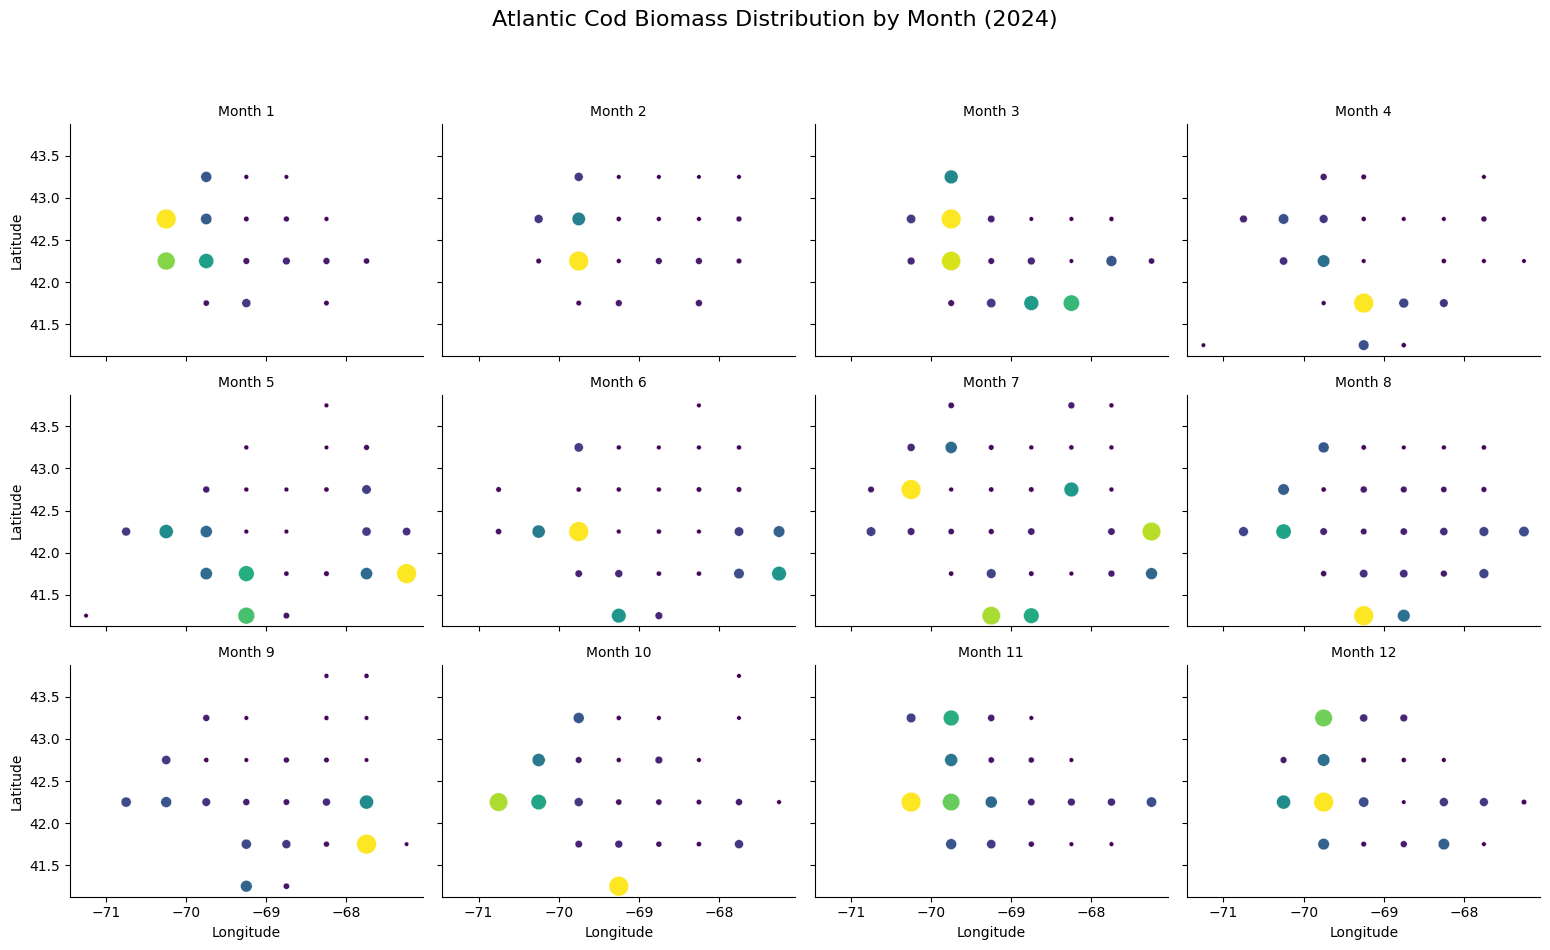

In [26]:
# Filter to Atlantic Cod
cod = df[df["COMNAME"] == "COD, ATLANTIC"]

# Choose a year (optional)
cod = cod[cod["DATE"].dt.year == 2024]

# Plot: FacetGrid by month
g = sns.FacetGrid(
    cod,
    col="MONTH",
    col_wrap=4,
    height=3,
    aspect=1.3
)

# Add a scatterplot where point size is scaled by biomass
g.map_dataframe(
    sns.scatterplot,
    x="LON",
    y="LAT",
    size="LIVEWT",
    sizes=(10, 200),
    hue="LIVEWT",
    palette="viridis",
    legend=False
)

g.set_axis_labels("Longitude", "Latitude")
g.set_titles("Month {col_name}")
plt.suptitle("Atlantic Cod Biomass Distribution by Month (2024)", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


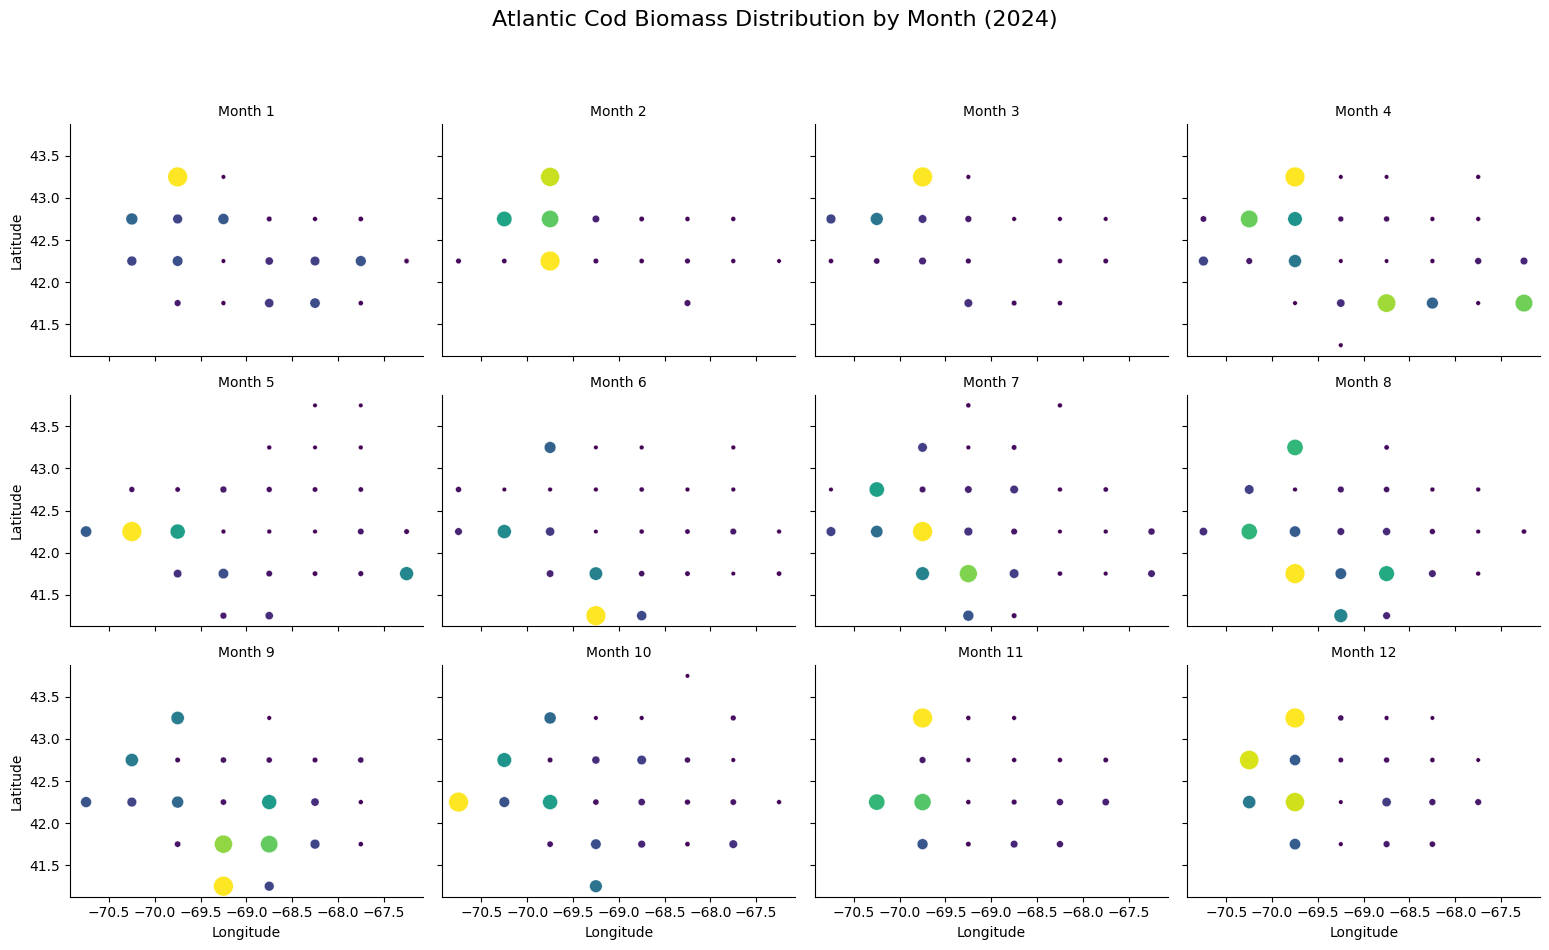

In [27]:
# Filter to Atlantic Cod
cod = df[df["COMNAME"] == "COD, ATLANTIC"]

# Choose a year (optional)
cod = cod[cod["DATE"].dt.year == 2023]

# Plot: FacetGrid by month
g = sns.FacetGrid(
    cod,
    col="MONTH",
    col_wrap=4,
    height=3,
    aspect=1.3
)

# Add a scatterplot where point size is scaled by biomass
g.map_dataframe(
    sns.scatterplot,
    x="LON",
    y="LAT",
    size="LIVEWT",
    sizes=(10, 200),
    hue="LIVEWT",
    palette="viridis",
    legend=False
)

g.set_axis_labels("Longitude", "Latitude")
g.set_titles("Month {col_name}")
plt.suptitle("Atlantic Cod Biomass Distribution by Month (2024)", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

Cartopy will be used to add coastlines to give a better visual of where fish are

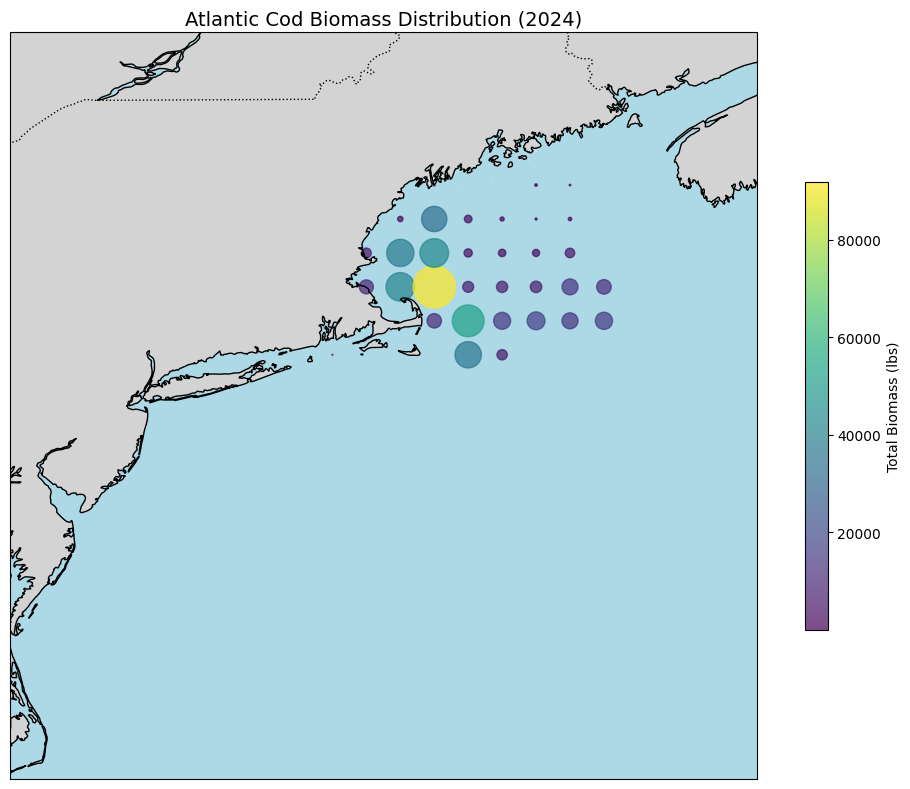

In [ ]:
# Filter for COD, ATLANTIC in 2024
cod_2024 = df[(df["COMNAME"] == "COD, ATLANTIC") & (df["DATE"].dt.year == 2024)]

# Aggregate biomass by lat/lon
cod_agg = cod_2024.groupby(["LAT", "LON"], as_index=False)["LIVEWT"].sum()

# Plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.set_title("Atlantic Cod Biomass Distribution (2024)", fontsize=14)
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Scatter plot with size scaled by biomass
sc = ax.scatter(
    cod_agg["LON"], cod_agg["LAT"],
    s=cod_agg["LIVEWT"] / 100,  
    c=cod_agg["LIVEWT"],
    cmap="viridis",
    alpha=0.7,
    transform=ccrs.PlateCarree()
)

# Add colorbar
plt.colorbar(sc, label="Total Biomass (lbs)", orientation="vertical", shrink=0.6)
ax.set_extent([-76, -65, 35, 46])  # Adjust view to the relevant area

plt.tight_layout()
plt.show()


/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/66704015.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


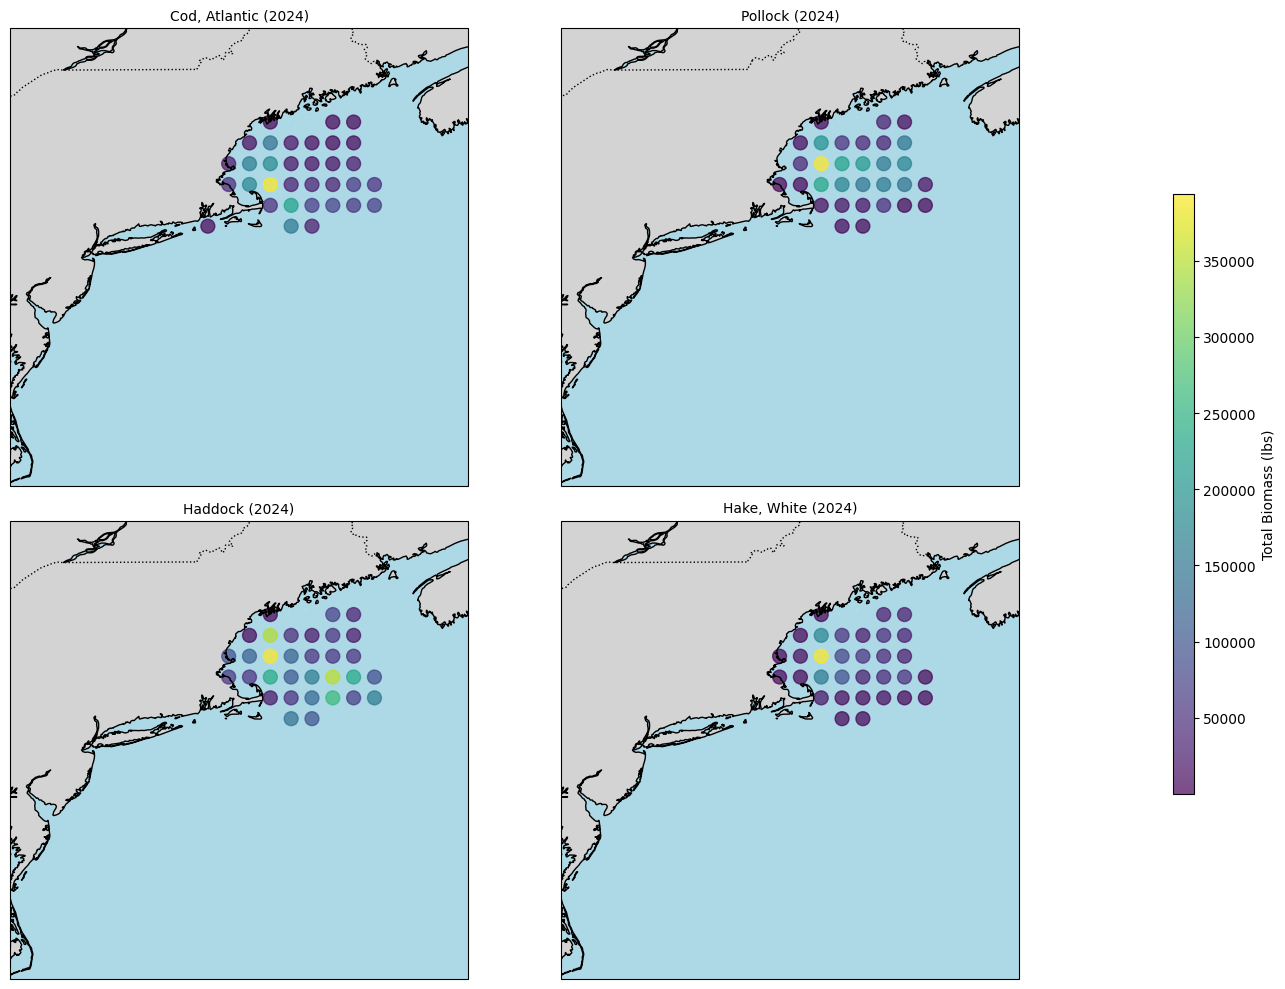

In [41]:
# List of species to compare
species_list = ["COD, ATLANTIC", "POLLOCK", 
                "HADDOCK", "HAKE, WHITE"]

# Setup subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, species in enumerate(species_list):
    ax = axs[i]

    # Filter and aggregate
    data = df[(df["COMNAME"] == species) & (df["DATE"].dt.year == 2024)]
    agg = data.groupby(["LAT", "LON"], as_index=False)["LIVEWT"].sum()

    # Base map
    ax.set_title(f"{species.title()} (2024)", fontsize=10)
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.set_extent([-76, -65, 35, 46])

    # Scatter
    sc = ax.scatter(
        agg["LON"], agg["LAT"],
        c=agg["LIVEWT"],
        s=100,
        cmap="viridis",
        alpha=0.7,
        transform=ccrs.PlateCarree()
    )

# Add one colorbar for all
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Total Biomass (lbs)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/2161021141.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


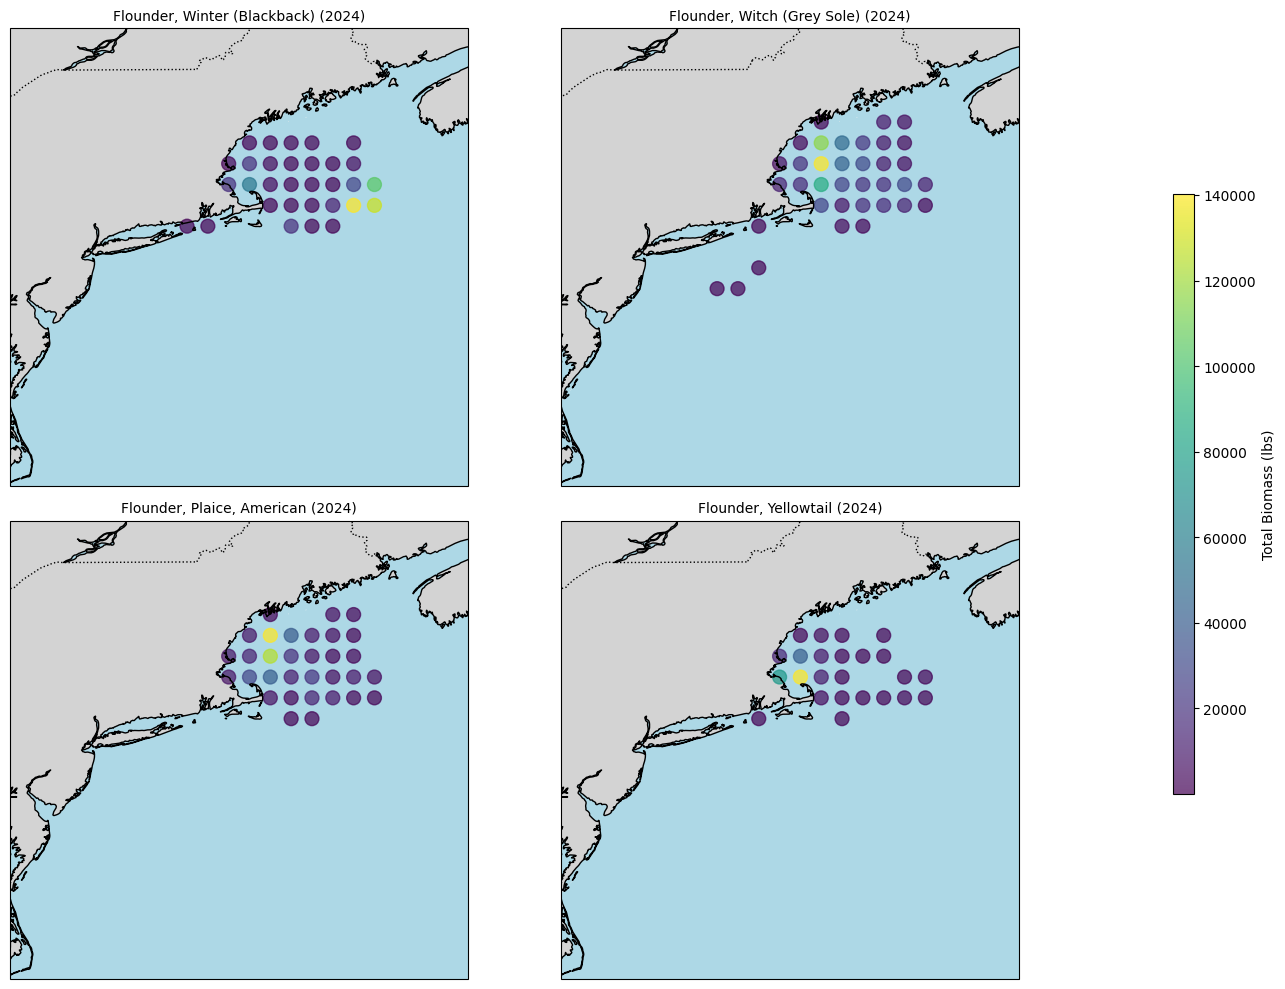

In [43]:
# List of species to compare
species_list = ["FLOUNDER, WINTER (BLACKBACK)", "FLOUNDER, WITCH (GREY SOLE)", "FLOUNDER, PLAICE, AMERICAN", "FLOUNDER, YELLOWTAIL"]

# Setup subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()

for i, species in enumerate(species_list):
    ax = axs[i]

    # Filter and aggregate
    data = df[(df["COMNAME"] == species) & (df["DATE"].dt.year == 2024)]
    agg = data.groupby(["LAT", "LON"], as_index=False)["LIVEWT"].sum()

    # Base map
    ax.set_title(f"{species.title()} (2024)", fontsize=10)
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.set_extent([-76, -65, 35, 46])

    # Scatter
    sc = ax.scatter(
        agg["LON"], agg["LAT"],
        c=agg["LIVEWT"],
        s=100,
        cmap="viridis",
        alpha=0.7,
        transform=ccrs.PlateCarree()
    )

# Add one colorbar for all
cbar_ax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
fig.colorbar(sc, cax=cbar_ax, label="Total Biomass (lbs)")

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/757901607.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_catch = group_df.groupby(['COMNAME', pd.Grouper(key='DATE', freq='M')])['LIVEWT'].sum().reset_index()
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/757901607.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_catch = group_df.groupby(['COMNAME', pd.Grouper(key='DATE', freq='M')])['LIVEWT'].sum().reset_index()
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_27875/757901607.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_catch = group_df.groupby(['COMNAME', pd.Grouper(key='DATE', freq='M')])['LIVEWT'].sum().reset_index()


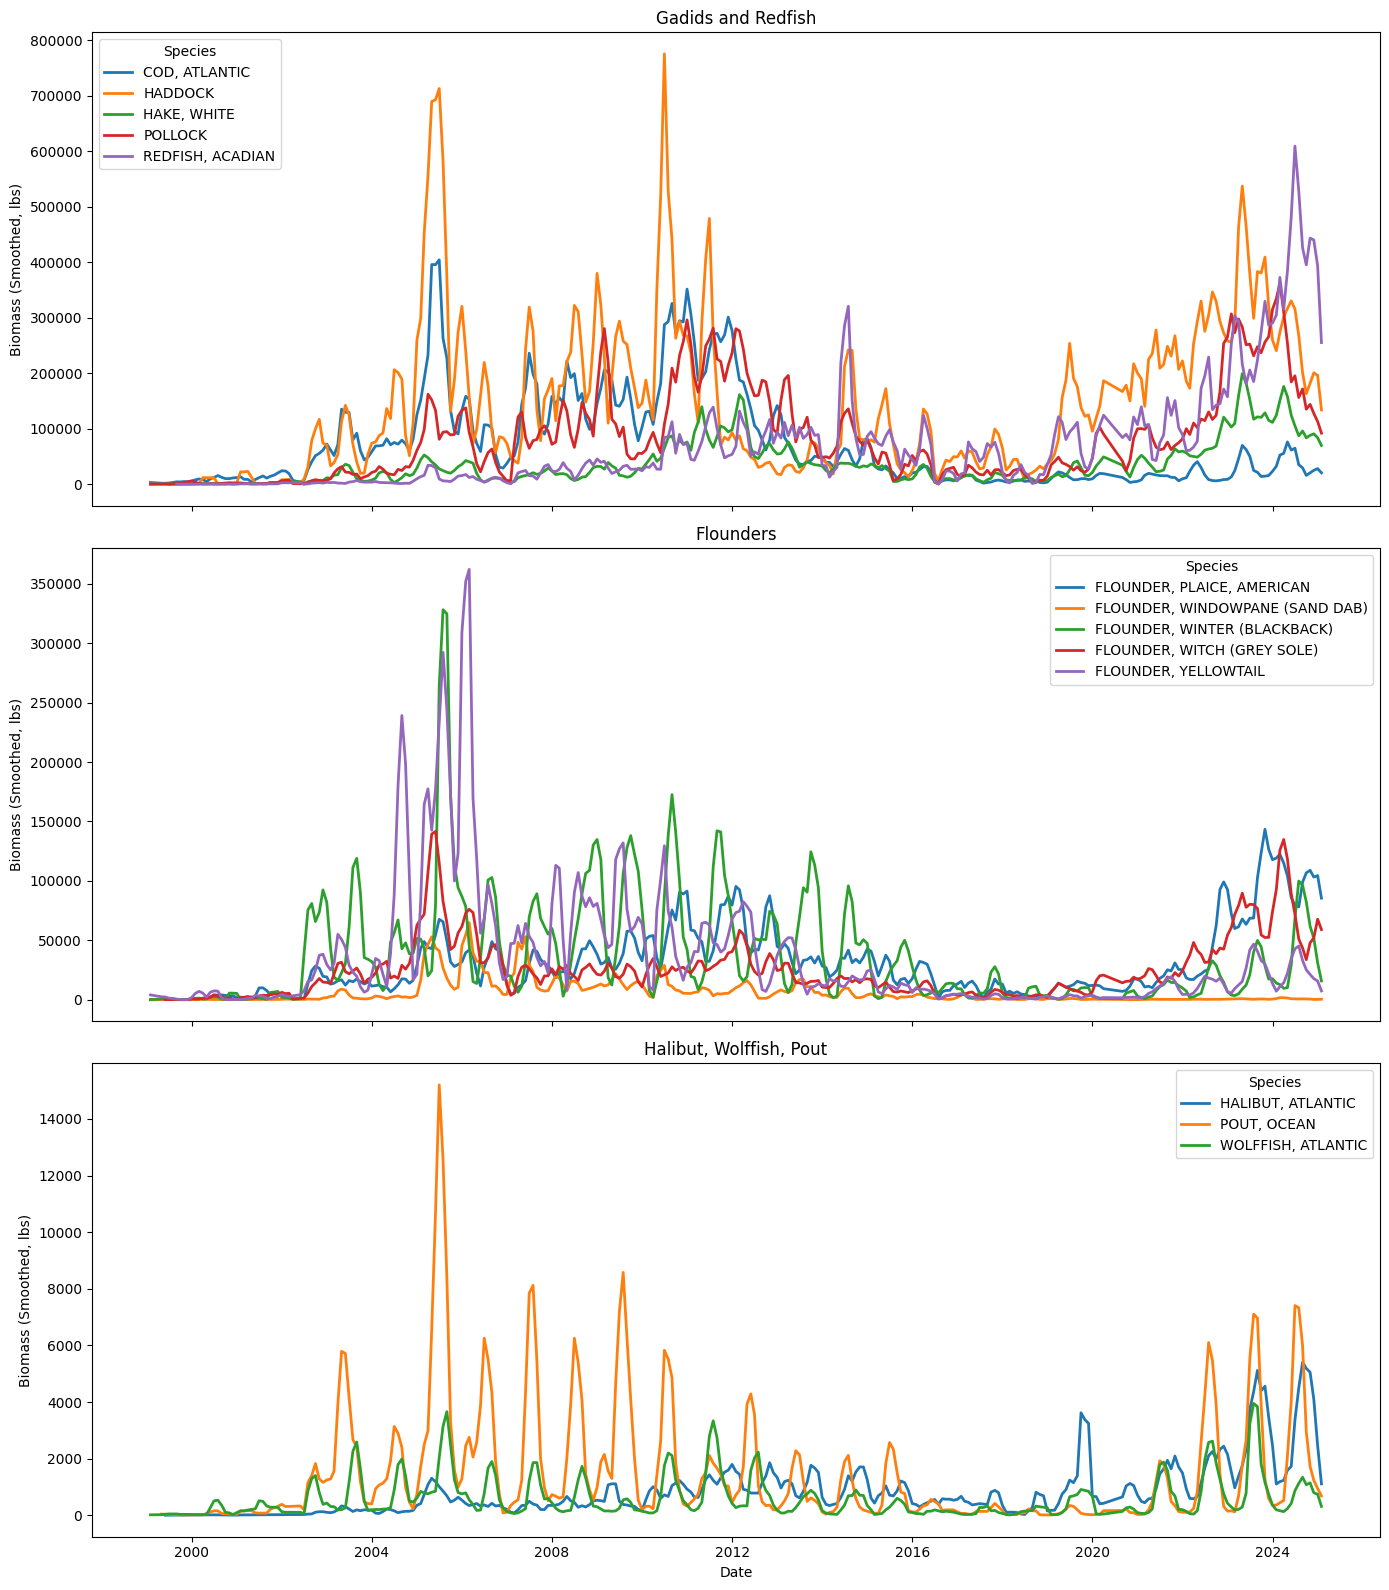

In [49]:
# Filter to ASM species only
asm_df = df[df['ASM'] == 1]

# Define species groups
group1 = ["COD, ATLANTIC", "HADDOCK", "HAKE, WHITE", "POLLOCK", "REDFISH, ACADIAN"]
group2 = ["FLOUNDER, WINTER (BLACKBACK)", "FLOUNDER, YELLOWTAIL", "FLOUNDER, PLAICE, AMERICAN", "FLOUNDER, WITCH (GREY SOLE)", "FLOUNDER, WINDOWPANE (SAND DAB)"]
group3 = ["HALIBUT, ATLANTIC", "WOLFFISH, ATLANTIC", "POUT, OCEAN"]

def plot_group(species_list, title, ax):
    # Filter for species in group
    group_df = asm_df[asm_df['COMNAME'].isin(species_list)]
    # Aggregate monthly biomass
    monthly_catch = group_df.groupby(['COMNAME', pd.Grouper(key='DATE', freq='M')])['LIVEWT'].sum().reset_index()
    # Smooth with rolling mean 3 months
    monthly_catch['LIVEWT_SMOOTH'] = monthly_catch.groupby('COMNAME')['LIVEWT'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
    
    sns.lineplot(data=monthly_catch, x='DATE', y='LIVEWT_SMOOTH', hue='COMNAME', ax=ax, palette='tab10', linewidth=2)
    ax.set_title(title)
    ax.set_ylabel('Biomass (Smoothed, lbs)')
    ax.set_xlabel('Date')
    ax.legend(title='Species')

fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

plot_group(group1, "Gadids and Redfish", axes[0])
plot_group(group2, "Flounders", axes[1])
plot_group(group3, "Halibut, Wolffish, Pout", axes[2])

plt.tight_layout()
plt.show()

In [50]:
# Step 1: Create a year-month column in df2 and count records (observer effort proxy)
df2['year_month'] = df2['DATE'].dt.to_period('M')
effort = df2.groupby('year_month').size().rename('species_records').reset_index()

# Step 2: Prepare your biomass data (also needs a year_month column)
df['year_month'] = df['DATE'].dt.to_period('M')

# Aggregate biomass by year_month and species
biomass_monthly = df.groupby(['year_month', 'COMNAME'])['LIVEWT'].sum().reset_index()

# Step 3: Merge biomass with effort
biomass_effort = biomass_monthly.merge(effort, on='year_month', how='left')

# Step 4: Calculate normalized biomass per species per month
biomass_effort['normalized_biomass'] = biomass_effort['LIVEWT'] / biomass_effort['species_records']

# Now you can plot normalized_biomass over time for your species


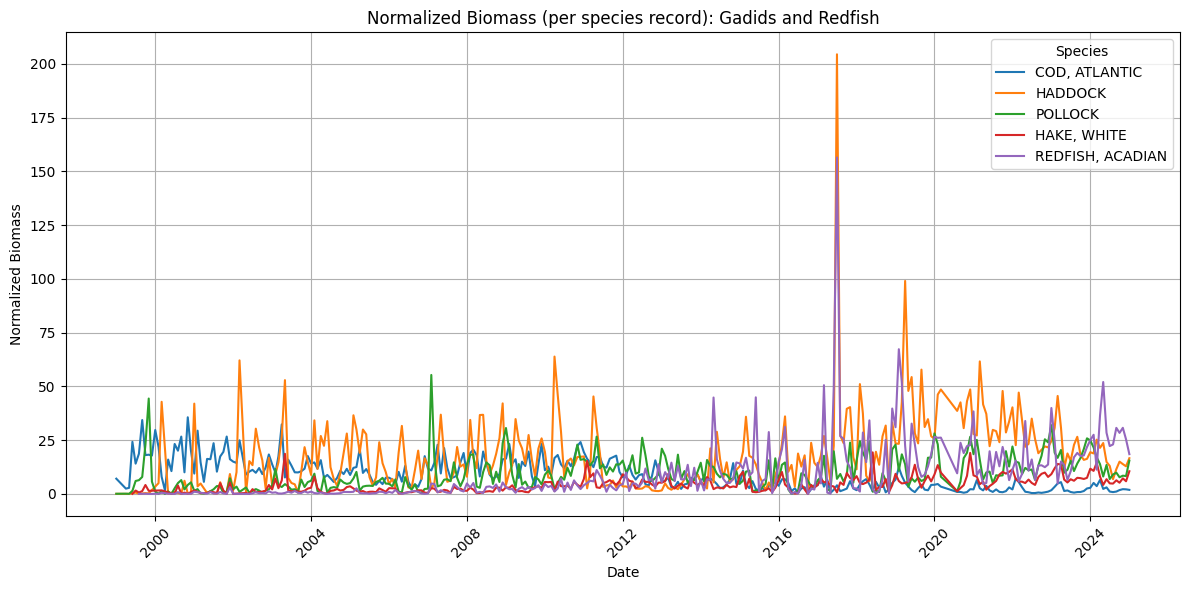

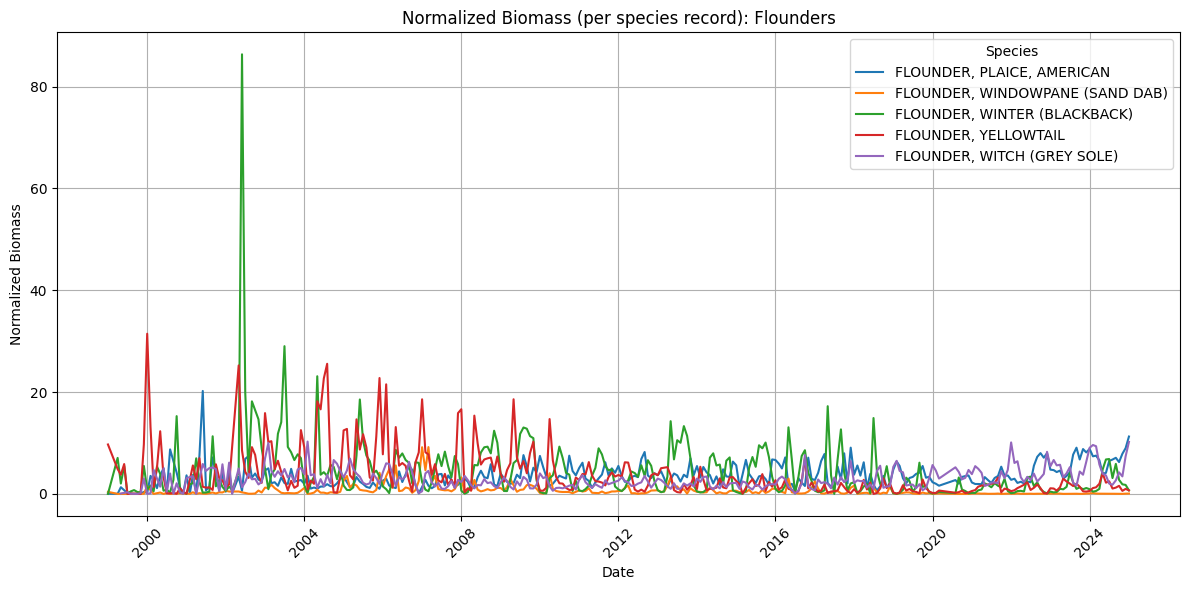

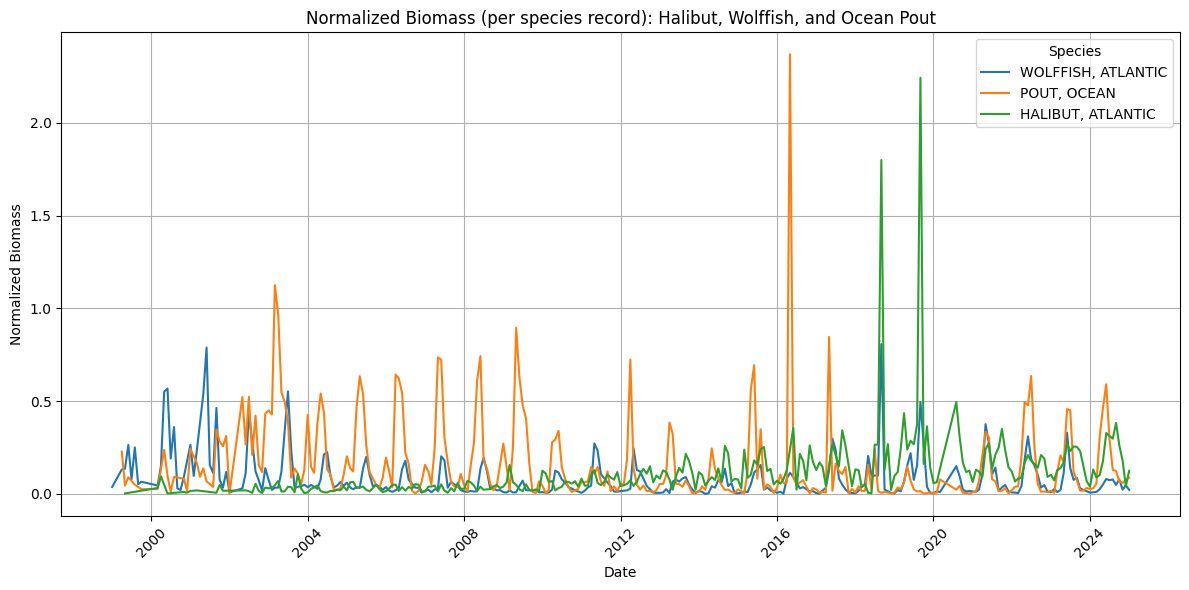

In [54]:
biomass_effort["year_month"] = biomass_effort["year_month"].dt.to_timestamp()

def plot_group_normalized(species_list, title):
    plt.figure(figsize=(12, 6))
    subset = biomass_effort[biomass_effort["COMNAME"].isin(species_list)]
    sns.lineplot(data=subset, x="year_month", y="normalized_biomass", hue="COMNAME")
    plt.title(f"Normalized Biomass (per species record): {title}")
    plt.xlabel("Date")
    plt.ylabel("Normalized Biomass")
    plt.xticks(rotation=45)
    plt.legend(title="Species")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

plot_group_normalized(group1, "Gadids and Redfish")
plot_group_normalized(group2, "Flounders")
plot_group_normalized(group3, "Halibut, Wolffish, and Ocean Pout")
